In [5]:
import networkx as nx
import itertools
import collections
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit

# TP - create a bipartite graph projection

In [13]:
def flatten(matrix):
    return [item for row in matrix for item in row]

### NETWORK INFO

In [6]:
df=pd.read_csv('datasets/Marvel.csv')

In [7]:
df

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [10]:
grouped=df.groupby('comic',as_index=False)['hero'].agg(list)

In [11]:
grouped

,comic,hero
0,2001 10,[MACHINE MAN/X-51]
1,2001 8,[MACHINE MAN/X-51]
2,2001 9,[MACHINE MAN/X-51]
3,A '00,"[BLISS, MISS, BRUTACUS, CAPTAIN AMERICA, DABOI..."
4,A '01,"[ANT-MAN/DR. HENRY J., CAPTAIN MARVEL II/MO, F..."
...,...,...
12646,YOUNG MEN 26,[NOMAD III/JACK MONRO]
12647,YOUNG MEN 27,[NOMAD III/JACK MONRO]
12648,YOUNG MEN 28,[NOMAD III/JACK MONRO]
12649,"cept. This listing,",[CAPTAIN UNIVERSE/STE]


In [12]:
list1=[i for i in grouped['hero'] if len(i)>1]

In [17]:
list(itertools.combinations([1,2,3],2))

[(1, 2), (1, 3), (2, 3)]

In [18]:
listEdges=[list(itertools.combinations(i,2)) for i in list1]

In [19]:
listEdges=flatten(listEdges)

In [20]:
weightedEdges=collections.Counter(listEdges)

In [24]:
G=nx.Graph()
G.add_edges_from(weightedEdges.keys())


In [25]:
for (u,v) in G.edges():
    G[u][v]['weight']=weightedEdges[(u,v)]

# WEIGHTED NETWORKS

In [ ]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

def powerLaw(x, a, b):
    return b*x**(a)

In [26]:
strenghts=[]
degrees=[]
for i in G.nodes():
    strenghts.append(G.degree(i,weight='weight'))
    degrees.append(G.degree(i))

In [32]:
#statistical binning
logBins=np.logspace(np.log2(np.min(degrees)),np.log2(np.max(degrees)),base=2,num=10)
ybin,xbin,binnumber=scipy.stats.binned_statistic(degrees,strenghts,statistic='mean',bins=logBins)

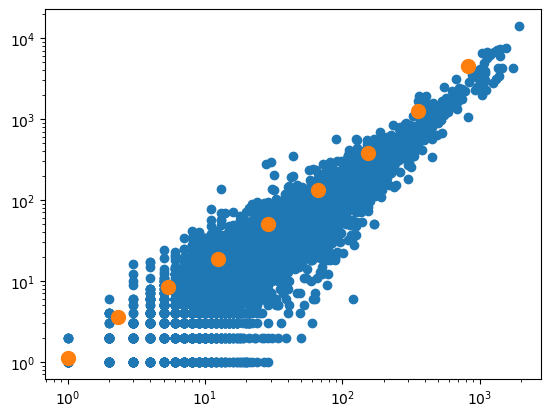

In [31]:
plt.loglog(degrees,strenghts,'o')
plt.semilogx(xbin[:-1],ybin,'o',markersize=10)
plt.show()

In [38]:
from scipy.optimize import curve_fit
import scipy.stats


popt, pcov = curve_fit(powerLaw, degrees, strenghts)  
print (popt[0])



1.5030160605872063


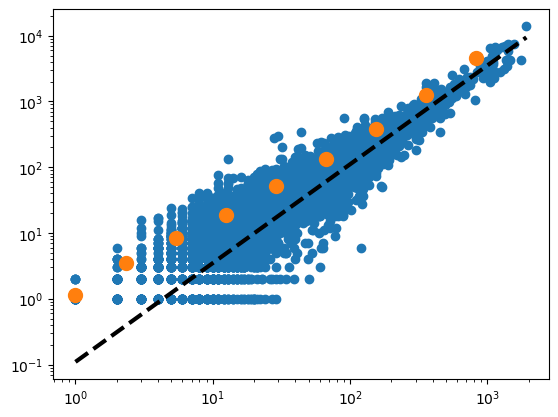

In [39]:
plt.loglog(degrees,strenghts,'o')
plt.loglog(xbin[:-1],ybin,'o',markersize=10)
plt.loglog(sorted(degrees), powerLaw(sorted(degrees), *popt), '--',c='k',linewidth=3)
plt.show()